In [1]:
import keras
from keras import datasets
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# 加载数据集
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train = keras.utils.normalize(X_train)
X_test = keras.utils.normalize(X_test)

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [3]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [4]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# 序贯模型
model = Sequential()
# 三个全连接层
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 批量梯度下降
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [8]:
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.2235 - acc: 0.9333 - val_loss: 0.1120 - val_acc: 0.9652
Epoch 2/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0842 - acc: 0.9735 - val_loss: 0.0888 - val_acc: 0.9722
Epoch 3/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.0557 - acc: 0.9828 - val_loss: 0.0777 - val_acc: 0.9755
Epoch 4/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0413 - acc: 0.9866 - val_loss: 0.0855 - val_acc: 0.9760
Epoch 5/5
60000/60000 [==============================] - 7s 121us/step - loss: 0.0318 - acc: 0.9891 - val_loss: 0.0728 - val_acc: 0.9806


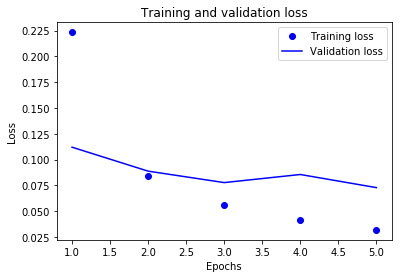

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

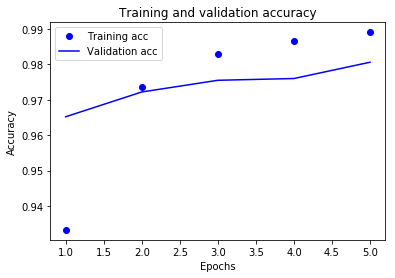

In [12]:
plt.clf()   # clear figure
acc_values = history.history['acc']
val_acc_values = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [13]:
score = model.evaluate(X_test, y_test)
print(score)

10000/10000 [==============================] - 0s 40us/step
[0.07279153847591951, 0.9806]
